In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
strainFilepath="/home/mitsuki/altorf/mbgd/data/strain.lst"
strain_lst=[s.strip() for s in open(strainFilepath, 'r').readlines()]

In [4]:
filepath="/home/mitsuki/altorf/mbgd/analyze/out/test_eab_ovr.csv"
all_df=pd.read_csv(filepath)
all_df.head()

,overlap_id,ofirst,olast,olength,start_per,end_per,qfamily,sfamily,qorf_id,sorf_id,...,qstart_pro,qend_pro,sstart_dna,send_dna,sstart_pro,send_pro,region_id,chr_name,score_dna,score_pro
0,0,190,255,66,0.358079,0.641921,family15235,thrL#1,eln:NRG857_00010,eab:ECABU_RS00005,...,29,50,0,66,0,22,16582,eab:chromosome-1-1,117.6,-18.0
1,1,190,255,66,0.000000,1.000000,thrL#72,thrL#1,gm03564:COA_RS01000000123870,eab:ECABU_RS00005,...,1,22,0,66,0,22,16341,eab:chromosome-1-1,129.5,82.0
2,2,190,255,66,0.000000,1.000000,thrL#54,thrL#1,ese:ECSF_RS00005,eab:ECABU_RS00005,...,1,22,0,66,0,22,16365,eab:chromosome-1-1,129.5,82.0
3,3,190,255,66,0.000000,1.000000,thrL#49,thrL#1,eoc:CE10_RS00005,eab:ECABU_RS00005,...,1,22,0,66,0,22,16561,eab:chromosome-1-1,129.5,82.0
4,4,190,255,66,0.000000,1.000000,family15236,thrL#1,eln:ST1568,eab:ECABU_RS00005,...,1,24,0,66,0,22,16584,eab:chromosome-1-1,128.5,71.5


In [6]:
filepath="../arxiv/ecoli/out/{}_out.csv".format(strain_lst[0])
with open(filepath, 'r') as f:
    column_lst=f.readline().strip().split(',')
all_df=pd.DataFrame(columns=column_lst)

for strain in strain_lst:
    filepath="../arxiv/ecoli/out/{}_out.csv".format(strain)
    df=pd.read_csv(filepath)
    all_df=pd.concat([all_df, df])
print(all_df.shape)
all_df.head()

(110249, 36)


,region_id,chr_name,ofirst,olast,olength,sfamily,cds_name,cds_strand,sstart_gen,send_gen,...,bitscore,hit_strand,start_per,end_per,qstart_gen,qend_gen,qstart_pro,qend_pro,score_gen,score_pro
0,26357.0,ecg:chromosome-1-1,190.0,255.0,66.0,thrL#10,E2348C_0001,1.0,0.0,66.0,...,392.0,-1.0,0.358079,0.641921,86.0,152.0,29.0,50.0,117.6,-18.0
1,26150.0,ecg:chromosome-1-1,190.0,255.0,66.0,thrL#10,E2348C_0001,1.0,0.0,66.0,...,122.0,1.0,0.000000,1.000000,1.0,66.0,1.0,22.0,129.5,82.0
2,26174.0,ecg:chromosome-1-1,190.0,255.0,66.0,thrL#10,E2348C_0001,1.0,0.0,66.0,...,122.0,1.0,0.000000,1.000000,1.0,66.0,1.0,22.0,129.5,82.0
3,26336.0,ecg:chromosome-1-1,190.0,255.0,66.0,thrL#10,E2348C_0001,1.0,0.0,66.0,...,122.0,1.0,0.000000,1.000000,1.0,66.0,1.0,22.0,129.5,82.0
4,26359.0,ecg:chromosome-1-1,190.0,255.0,66.0,thrL#10,E2348C_0001,1.0,0.0,66.0,...,95.3,1.0,0.000000,1.000000,1.0,72.0,1.0,24.0,128.5,71.5


In [7]:
filtered_df=all_df[all_df["olength"]>100]
print(filtered_df.shape)
filtered_df.head()

(36575, 36)


,region_id,chr_name,ofirst,olast,olength,sfamily,cds_name,cds_strand,sstart_gen,send_gen,...,bitscore,hit_strand,start_per,end_per,qstart_gen,qend_gen,qstart_pro,qend_pro,score_gen,score_pro
15,26030.0,ecg:chromosome-1-1,5444.0,5557.0,114.0,family8644,PL4,-1.0,0.0,114.0,...,231.0,1.0,0.00000,0.911290,1.0,114.0,1.0,38.0,225.5,-10.5
18,25454.0,ecg:chromosome-1-1,12284.0,12799.0,516.0,yaaW,E2348C_0012,-1.0,11.0,527.0,...,942.0,1.0,0.00000,1.000000,1.0,516.0,1.0,172.0,1023.5,-26.5
19,26147.0,ecg:chromosome-1-1,13612.0,15528.0,1917.0,dnaK,E2348C_0014,1.0,0.0,1917.0,...,3685.0,-1.0,0.03831,0.979371,79.0,1995.0,27.0,665.0,3789.5,-99.5
37,9677.0,ecg:chromosome-1-1,51239.0,51493.0,255.0,"kefC#2,kefC#1",E2348C_0048,1.0,594.0,849.0,...,84.2,1.0,0.00000,1.000000,589.0,843.0,197.0,281.0,351.9,279.0
38,617.0,ecg:chromosome-1-1,74373.0,74475.0,103.0,family857,E2348C_0066,1.0,1039.0,1142.0,...,47.3,1.0,0.00000,1.000000,1016.0,1118.0,339.0,372.0,146.7,121.0


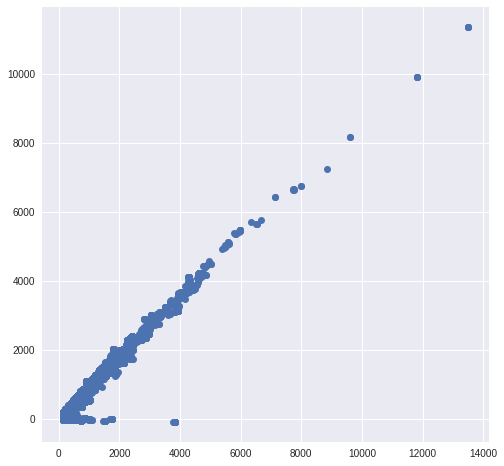

In [8]:
plt.figure(figsize=(8,8))
plt.plot(filtered_df["score_gen"],filtered_df["score_pro"], 'o')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-100,500)
#plt.ylim(-100,500)

In [9]:
columns_lst=["sstrain", "qstrain", "region_id"]
filtered_df[filtered_df["score_pro"]<0]
#filtered_df[(filtered_df["score_pro"]<0) & (filtered_df["olength"]>100)][columns_lst]

,region_id,chr_name,ofirst,olast,olength,sfamily,cds_name,cds_strand,sstart_gen,send_gen,...,bitscore,hit_strand,start_per,end_per,qstart_gen,qend_gen,qstart_pro,qend_pro,score_gen,score_pro
15,26030.0,ecg:chromosome-1-1,5444.0,5557.0,114.0,family8644,PL4,-1.0,0.0,114.0,...,231.0,1.0,0.000000,0.911290,1.0,114.0,1.0,38.0,225.5,-10.5
18,25454.0,ecg:chromosome-1-1,12284.0,12799.0,516.0,yaaW,E2348C_0012,-1.0,11.0,527.0,...,942.0,1.0,0.000000,1.000000,1.0,516.0,1.0,172.0,1023.5,-26.5
19,26147.0,ecg:chromosome-1-1,13612.0,15528.0,1917.0,dnaK,E2348C_0014,1.0,0.0,1917.0,...,3685.0,-1.0,0.038310,0.979371,79.0,1995.0,27.0,665.0,3789.5,-99.5
192,25021.0,ecg:chromosome-1-1,200636.0,200741.0,106.0,family8251,PL171,-1.0,103.0,209.0,...,63.9,-1.0,0.000000,1.000000,174.0,279.0,58.0,93.0,148.3,-16.0
307,24842.0,ecg:chromosome-1-1,282198.0,282308.0,111.0,family10227,E2348C_0251,1.0,0.0,111.0,...,219.0,-1.0,0.000000,0.852713,3.0,113.0,1.0,37.0,210.5,-11.5
315,26355.0,ecg:chromosome-1-1,288452.0,288562.0,111.0,ycjZ#1,E2348C_0258,1.0,783.0,894.0,...,152.0,-1.0,0.059829,1.000000,142.0,252.0,48.0,84.0,188.5,-26.0
454,16499.0,ecg:chromosome-1-1,319415.0,319560.0,146.0,yahH,E2348C_0284,1.0,0.0,146.0,...,75.0,1.0,0.088050,1.000000,135.0,285.0,45.0,95.0,220.8,-9.5
478,15901.0,ecg:chromosome-1-1,319415.0,319538.0,124.0,yahH,E2348C_0284,1.0,0.0,124.0,...,76.8,1.0,0.053846,1.000000,9.0,138.0,3.0,46.0,189.7,-9.5
479,16860.0,ecg:chromosome-1-1,319415.0,319604.0,190.0,yahH,E2348C_0284,1.0,0.0,190.0,...,87.9,1.0,0.035714,1.000000,9.0,210.0,3.0,70.0,285.7,-10.0
480,17124.0,ecg:chromosome-1-1,319415.0,319604.0,190.0,yahH,E2348C_0284,1.0,0.0,190.0,...,87.9,1.0,0.035714,1.000000,9.0,210.0,3.0,70.0,285.7,-10.0


In [13]:
filtered_df.columns

Index(['region_id', 'chr_name', 'ofirst', 'olast', 'olength', 'sfamily',
       'cds_name', 'cds_strand', 'sstart_gen', 'send_gen', 'sstart_pro',
       'send_pro', 'qfamily', 'qstrain', 'sstrain', 'qseqid', 'sseqid',
       'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart',
       'send', 'evalue', 'bitscore', 'hit_strand', 'start_per', 'end_per',
       'qstart_gen', 'qend_gen', 'qstart_pro', 'qend_pro', 'score_gen',
       'score_pro'],
      dtype='object')

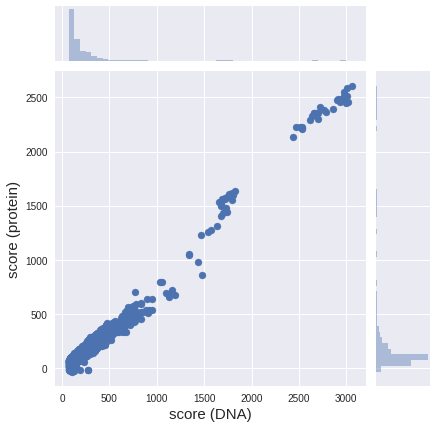

In [8]:
xClm="score_gen"
yClm="score_pro"
g=sns.jointplot(xClm, yClm, data=filtered_df, stat_func=None)
g=g.set_axis_labels("score (DNA)", "score (protein)", fontsize=15)
plt.show()

In [15]:
dir(g.size)

AttributeError: 'JointGrid' object has no attribute 'size'

(-100, 500)

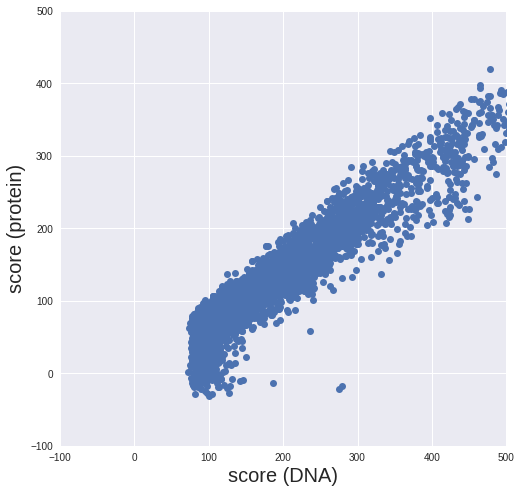

In [9]:
plt.figure(figsize=(8,8))
plt.plot(filtered_df["score_gen"],filtered_df["score_pro"], 'o')
plt.xlabel("score (DNA)", fontsize=20)
plt.ylabel("score (protein)", fontsize=20)
plt.xlim(-100,500)
plt.ylim(-100,500)

In [22]:
key_set=set()
for _,row in tmp_df.iterrows():
    key_set.add((row["qfamily"],row["sfamily"]))
print(tmp_df.shape)
len(key_set)

(332, 36)


101

In [12]:
tmp_df=df[(df["score_gen"]>200) & (df["score_pro"]<0)]
tmp_df.shape
tmp_df.head()

,region_id,chr_name,ofirst,olast,olength,sfamily,cds_name,cds_strand,sstart_gen,send_gen,...,bitscore,hit_strand,start_per,end_per,qstart_gen,qend_gen,qstart_pro,qend_pro,score_gen,score_pro
15,26030,ecg:chromosome-1-1,5444,5557,114,family8644,PL4,-1,0,114,...,231.0,1,0.00000,0.911290,1,114,1,38,225.5,-10.5
18,25454,ecg:chromosome-1-1,12284,12799,516,yaaW,E2348C_0012,-1,11,527,...,942.0,1,0.00000,1.000000,1,516,1,172,1023.5,-26.5
19,26147,ecg:chromosome-1-1,13612,15528,1917,dnaK,E2348C_0014,1,0,1917,...,3685.0,-1,0.03831,0.979371,79,1995,27,665,3789.5,-99.5
307,24842,ecg:chromosome-1-1,282198,282308,111,family10227,E2348C_0251,1,0,111,...,219.0,-1,0.00000,0.852713,3,113,1,37,210.5,-11.5
454,16499,ecg:chromosome-1-1,319415,319560,146,yahH,E2348C_0284,1,0,146,...,75.0,1,0.08805,1.000000,135,285,45,95,220.8,-9.5


In [23]:
tmp_df.to_csv("ecg_out_filtered.csv", index=False)

In [19]:
tmp_df.loc[19,:]

region_id                  26147
chr_name      ecg:chromosome-1-1
ofirst                     13612
olast                      15528
olength                     1917
sfamily                     dnaK
cds_name             E2348C_0014
cds_strand                     1
sstart_gen                     0
send_gen                    1917
sstart_pro                     0
send_pro                     639
qfamily              family12692
qstrain                      eci
sstrain                      ecg
qseqid                 eci:GIB30
sseqid        ecg:chromosome-1-1
pident                    99.313
length                      2037
mismatch                      14
gapopen                        0
qstart                         1
qend                        2037
sstart                     15606
send                       13570
evalue                         0
bitscore                    3685
hit_strand                    -1
start_per              0.0383104
end_per                 0.979371
qstart_gen

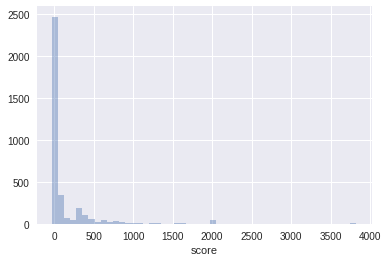

In [4]:
sns.distplot(df["score"], kde=False)

In [9]:
df[(df["score"]<-20) & (df["olength"]>50)]

,region_id,chr_name,ofirst,olast,cds_name,sfirst_pro,slast_pro,strain,family,qseqid,...,send,evalue,bitscore,strand,first_per,last_per,qfirst_pro,qlast_pro,score,olength
121,7022,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,ese:ECSF_RS20240,...,797955,2.870000e-26,113.0,+,0.262626,1.0,10,33,-23.0,73
122,7170,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,ecoj:P423_RS22690,...,797955,2.870000e-26,113.0,+,0.262626,1.0,10,33,-23.0,73
123,7318,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,ecp:ECP_RS21175,...,797955,6.170000e-28,119.0,+,0.262626,1.0,10,33,-23.0,73
124,7480,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,eci:UTI89_RS21950,...,797955,6.170000e-28,119.0,+,0.262626,1.0,10,33,-23.0,73
125,7642,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,eab:ECABU_RS22475,...,797955,6.170000e-28,119.0,+,0.262626,1.0,10,33,-23.0,73
126,7804,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,elc:I14_RS22130,...,797955,6.170000e-28,119.0,+,0.262626,1.0,10,33,-23.0,73
127,7964,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,eoc:CE10_RS23835,...,797955,1.320000e-34,141.0,+,0.262626,1.0,10,33,-23.0,73
128,8132,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,ecm:ECSMS35_RS22115,...,797955,1.320000e-34,141.0,+,0.262626,1.0,10,33,-23.0,73
129,8300,ecg:chromosome-1-1,797882,797955,PS1010,1,24,ecg,family1558,gm03564:COA_RS01000000123680,...,797955,6.130000e-33,135.0,+,0.262626,1.0,10,33,-23.0,73
361,2308,ecg:chromosome-1-1,3954404,3954482,PL3688,46,71,ecg,family1556,ecp:ECP_RS08605,...,3954404,3.460000e-11,63.9,-,0.000000,1.0,19,44,-24.0,78


In [19]:
min(df[(df["score"]<0) & (df["olength"]>20)]["score"])

-28.0

In [11]:
row=df.iloc[361,:]
row

region_id                   2308
chr_name      ecg:chromosome-1-1
ofirst                   3954404
olast                    3954482
cds_name                  PL3688
sfirst_pro                    46
slast_pro                     71
strain                       ecg
family                family1556
qseqid           ecp:ECP_RS08605
sseqid        ecg:chromosome-1-1
pident                    81.013
length                        79
mismatch                      15
gapopen                        0
qstart                        55
qend                         133
sstart                   3954482
send                     3954404
evalue                  3.46e-11
bitscore                    63.9
strand                         -
first_per                      0
last_per                       1
qfirst_pro                    19
qlast_pro                     44
score                        -24
olength                       78
Name: 361, dtype: object

In [21]:
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist
from Bio.pairwise2 import format_alignment
import sys
sys.path.append("/home/mitsuki/altorf/mbgd/blastn")
from create_query import extract_sequence

matrix = matlist.blosum62
gap_open=-10
gap_extend=-0.5

In [22]:
seq=extract_sequence(row["qseqid"],dtype="proteinseq")
qseq=seq[max(0,row["qfirst_pro"]):min(len(seq)-1,row["qlast_pro"])]#-1 to avoid inclusion of '*'
seq=extract_sequence(row["chr_name"].split(':')[0]+':'+row["cds_name"],dtype="proteinseq")
sseq=seq[max(0,row["sfirst_pro"]):min(len(seq)-1,row["slast_pro"])]

print(row["qfirst_pro"],row["qlast_pro"])
print(qseq)
print(row["sfirst_pro"],row["slast_pro"])
print(sseq)
print()

alns=pairwise2.align.globalds(qseq, sseq, matrix, gap_open, gap_extend)
for a in alns:
    print(format_alignment(*a))

19 44
NILNLHSFVGRIRRSRRIRREQSTL
46 71
KSALFMPDAAQTPYPTYKIVQTQYI

-NILNLHSFVGRIRRSRRIRREQSTL
||||||||||||||||||||||||||
KSALFMPDAAQTPYPTYKIVQTQ-YI
  Score=-24

-NILNLHSFVGRIRRSRRIRREQSTL
||||||||||||||||||||||||||
KSALFMPDAAQTPYPTYKIVQTQY-I
  Score=-24

